In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv("Company_Data.csv")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [214]:
# Start exploring the dataset
print(data.columns)
data.head()

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [215]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,7.50,124.97,68.66,6.63,264.84,115.80,53.32,13.90
std,2.82,15.33,27.99,6.65,147.38,23.68,16.20,2.62
min,0.00,77.00,21.00,0.00,10.00,24.00,25.00,10.00
25%,5.39,115.00,42.75,0.00,139.00,100.00,39.75,12.00
50%,7.49,125.00,69.00,5.00,272.00,117.00,54.50,14.00
75%,9.32,135.00,91.00,12.00,398.50,131.00,66.00,16.00
max,16.27,175.00,120.00,29.00,509.00,191.00,80.00,18.00


In [216]:
data.drop(['Sales'], axis="columns", inplace=True)

In [217]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

ShelveLoc : ['Bad' 'Good' 'Medium']
Urban : ['Yes' 'No']
US : ['Yes' 'No']


In [220]:
data['ShelveLoc'] = data.ShelveLoc.astype("category").cat.codes


In [223]:
data['Urban'] = data.Urban.astype("category").cat.codes
data['US'] = data.US.astype("category").cat.codes


In [224]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [225]:
data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

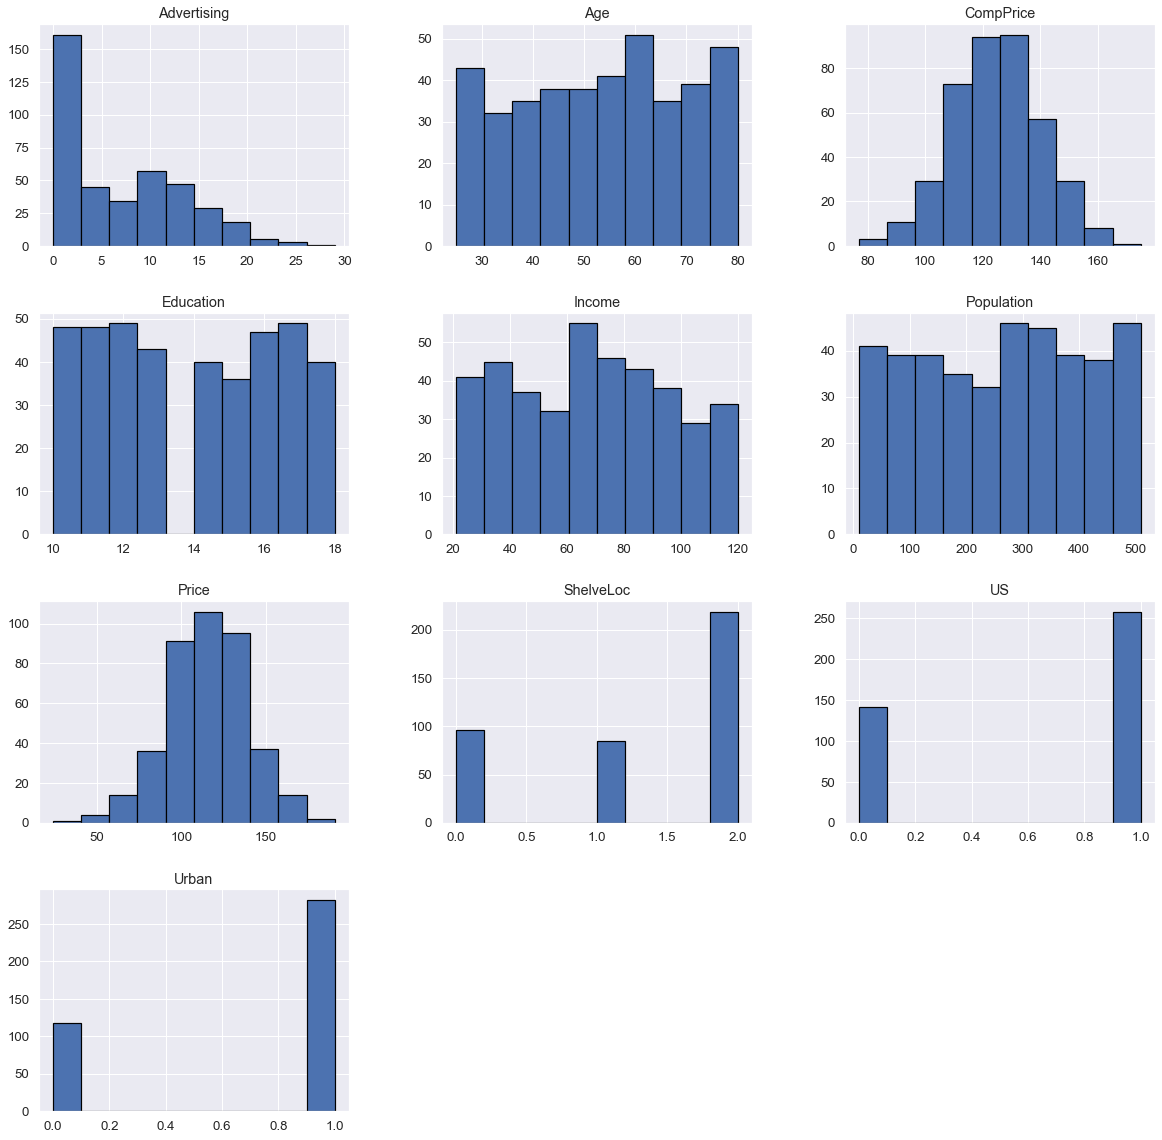

In [226]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

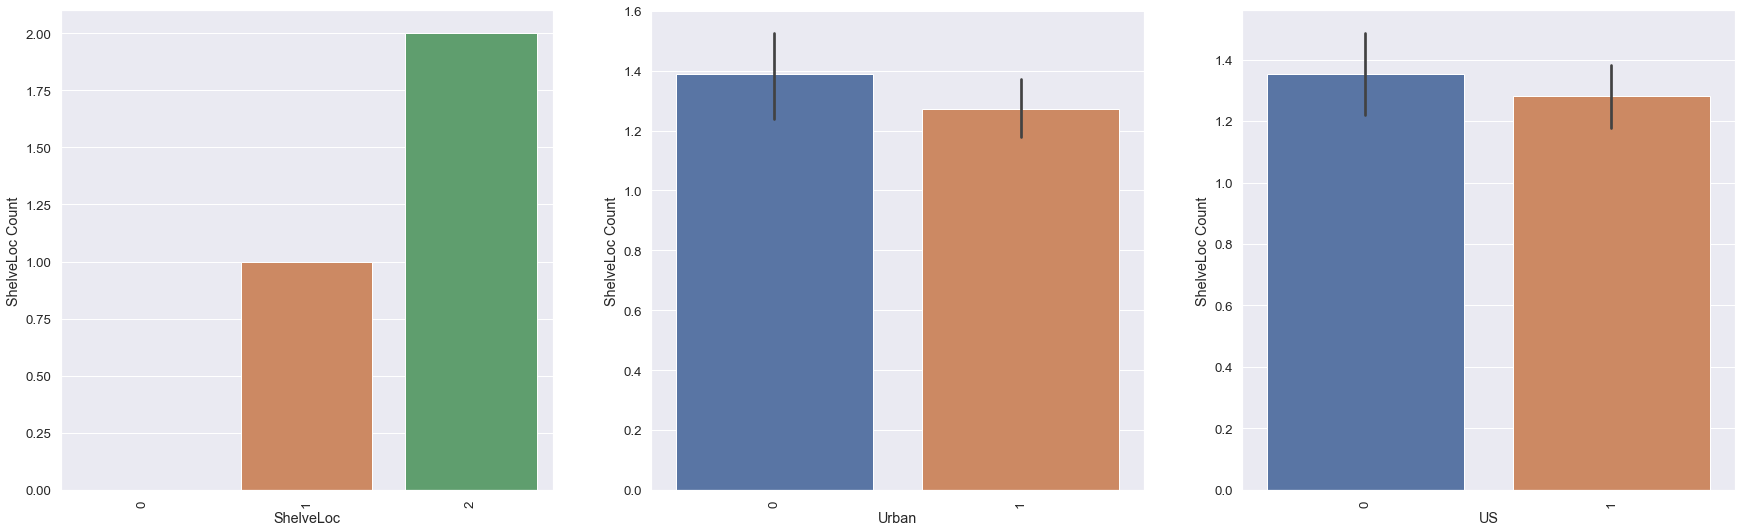

In [227]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='ShelveLoc', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('ShelveLoc Count')
    plt.xlabel(f'{column}')

<AxesSubplot:>

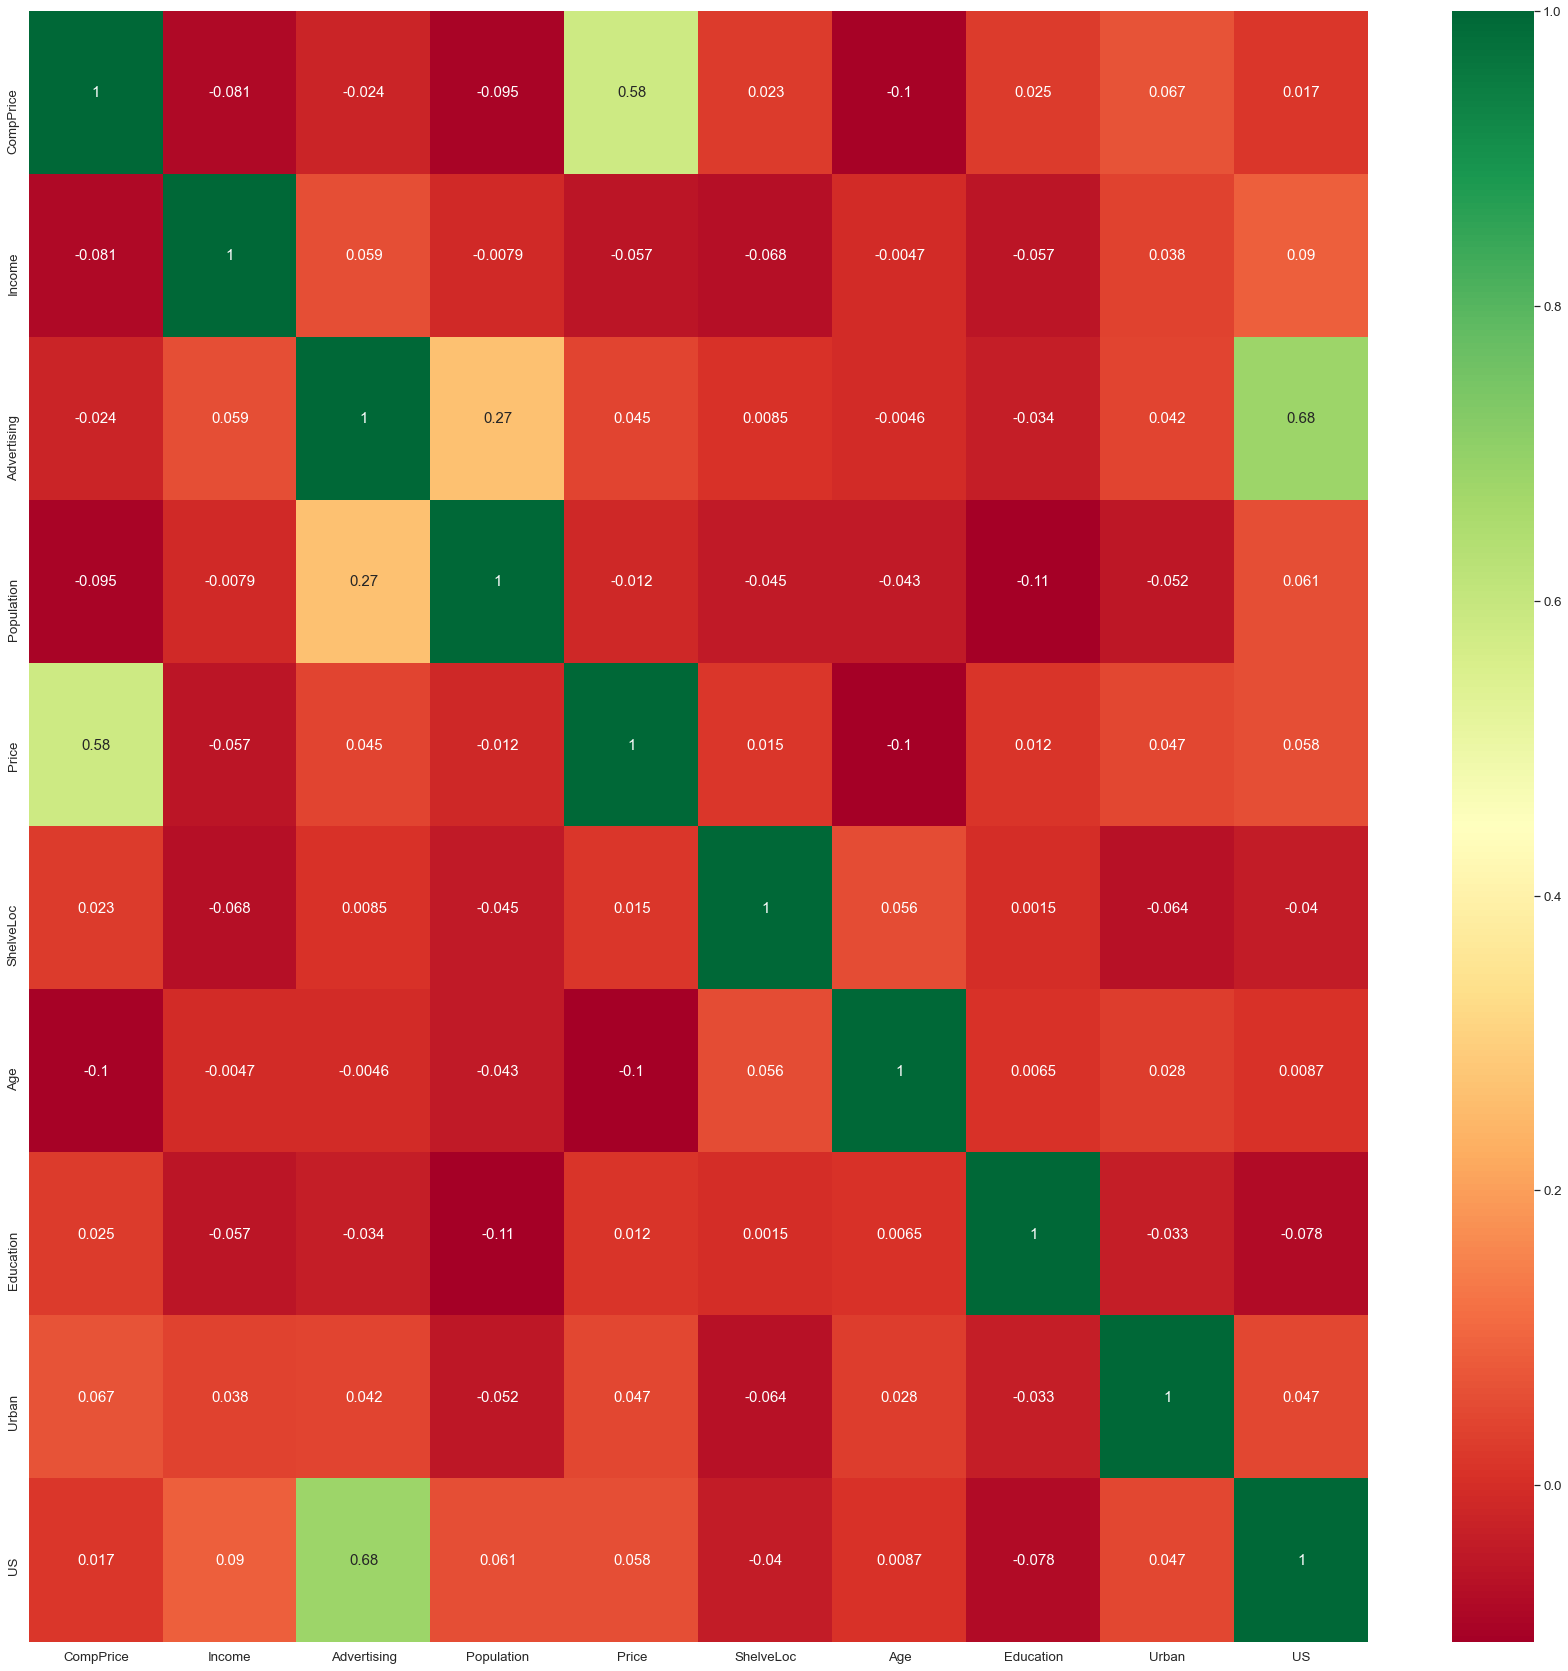

In [228]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Data Processing

In [229]:
# Transform categorical data into dummies
#categorical_col.remove("Shelveloc")
   # data = pd.get_dummies(data, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    data[column] = label.fit_transform(data[column])

In [230]:
from sklearn.model_selection import train_test_split

X = data.drop('ShelveLoc', axis=1)
y = data.ShelveLoc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Applying machine learning algorithms

In [231]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [232]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision  1.00  1.00   1.00      1.00       1.00          1.00
recall     1.00  1.00   1.00      1.00       1.00          1.00
f1-score   1.00  1.00   1.00      1.00       1.00          1.00
support   68.00 56.00 156.00      1.00     280.00        280.00
_______________________________________________
Confusion Matrix: 
 [[ 68   0   0]
 [  0  56   0]
 [  0   0 156]]

Test Result:
Accuracy Score: 35.83%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.08  0.10  0.51      0.36       0.23          0.31
recall     0.07  0.07  0.62      0.36       0.25          0.36
f1-score   0.08  0.08  0.56      0.36       0.24          0.33
support   28.00 29.00 63.00      0.36     120.00        120.00
__________________________________

# Decision Tree Classifier Hyperparameter tuning

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4492 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 12492 tasks      | elapsed:   31.5s


Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 55.71%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision  0.00  0.00   0.56      0.56       0.19          0.31
recall     0.00  0.00   1.00      0.56       0.33          0.56
f1-score   0.00  0.00   0.72      0.56       0.24          0.40
support   68.00 56.00 156.00      0.56     280.00        280.00
_______________________________________________
Confusion Matrix: 
 [[  0   0  68]
 [  0   0  56]
 [  0   0 156]]

Test Result:
Accuracy Score: 52.50%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.00  0.00  0.53      0.53       0.18          0.28
recall     0.00  0.00  1.00      0.53       0.33          0.53
f1-score   0.00  0.00  0.69      0.53  

[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   32.7s finished
C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [234]:
!pip install --upgrade scikit-learn==0.20.3

  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\pcs\anaconda3\lib\site-packages\scikit_learn-0.22.dist-info\
   from C:\Users\pcs\anaconda3\Lib\site-packages\~cikit_learn-0.22.dist-info
  Moving to c:\users\pcs\anaconda3\lib\site-packages\sklearn\
   from C:\Users\pcs\anaconda3\Lib\site-packages\~-learn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\pcs\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\pcs\\AppData\\Local\\Temp\\pip-install-1joa_itw\\scikit-learn\\setup.py'"'"'; __file__='"'"'C:\\Users\\pcs\\AppData\\Local\\Temp\\pip-install-1joa_itw\\scikit-learn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\pcs\AppData\Local\Temp\pip-wheel-yree5eyz'
       cwd: C:\Users\pcs\AppData\Local\Temp\pip-install-1joa_itw\scikit-learn\
  Complete output (678 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:/Users/pcs/anaconda3\\Library\\lib']
    NOT AVAILABLE
  
  blis_info:

In [235]:
!pip install --upgrade scikit-learn==0.22

    copying sklearn\cluster\tests\__init__.py -> build\lib.win-amd64-3.8\sklearn\cluster\tests
    creating build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\base.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\california_housing.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\covtype.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\kddcup99.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\lfw.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\mlcomp.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\mldata.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\olivetti_faces.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\openml.py -> build\lib.win-amd64-3.8\sklearn\datasets
    copying sklearn\datasets\rcv1.py -> build\lib.win-amd64-3.8\sklearn\datasets
    c

Requirement already up-to-date: scikit-learn==0.22 in c:\users\pcs\anaconda3\lib\site-packages (0.22)


In [236]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(data.columns)
features.remove("ShelveLoc")

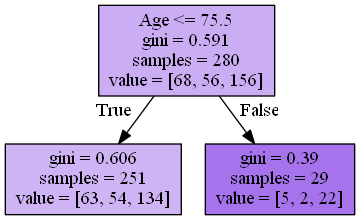

In [237]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [238]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1      2  accuracy  macro avg  weighted avg
precision  1.00  1.00   1.00      1.00       1.00          1.00
recall     1.00  1.00   1.00      1.00       1.00          1.00
f1-score   1.00  1.00   1.00      1.00       1.00          1.00
support   68.00 56.00 156.00      1.00     280.00        280.00
_______________________________________________
Confusion Matrix: 
 [[ 68   0   0]
 [  0  56   0]
 [  0   0 156]]

Test Result:
Accuracy Score: 49.17%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2  accuracy  macro avg  weighted avg
precision  0.25  0.25  0.52      0.49       0.34          0.39
recall     0.07  0.03  0.89      0.49       0.33          0.49
f1-score   0.11  0.06  0.65      0.49       0.28          0.38
support   28.00 29.00 63.00      0.49     120.00        120.00
__________________________________

In [263]:
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest classifier
The accuracy is  1.0
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0


C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  sample_weight=sample_weight,
C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  sample_weight=sample_weight,
C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  (array([0.        , 0.        , 0.66...]),
C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  Returns


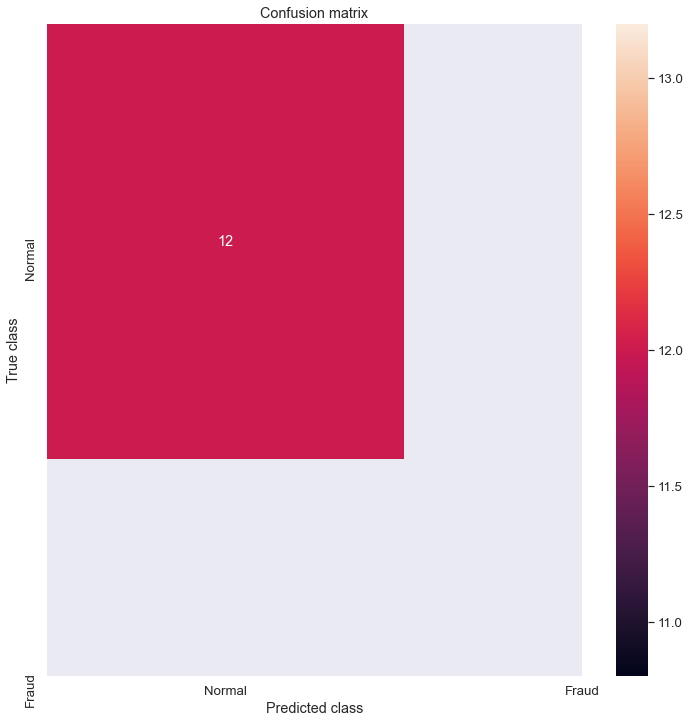

In [264]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [265]:
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Random Forest: 0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



<Figure size 648x504 with 0 Axes>